Aquesta base de dades recull les experiències laborals que han tingut les persones usuàries del servei.

En aquest cas hem creat les següents columnes:

a.	**Data incorporació mercat laboral** on hem introduït la  primera data d’inici de contracte de les diferents experiències laborals

b.	**Temps total experiència** on hem recollit el temps total de de les diferents experiències laborals

c.	**Nombre d’experiències** on hem recollit el nombre d’experiències laborals que ha tingut la persona

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Experiència Laboral.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

df_i=df

In [3]:
#seleccionem columnes
df=df[['stic_experiencia_laboral_contactscontacts_ida','Càrrec/Lloc de Feina','Empresa','Data inici','Data final','Motiu finalització del contracte']]

In [4]:
#cambiem el nom de la columna stic_experiencia_laboral_contactscontacts_ida per ID
df.rename(columns={'stic_experiencia_laboral_contactscontacts_ida':'ID'},inplace=True)

/tmp/ipykernel_13500/3394776135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'stic_experiencia_laboral_contactscontacts_ida':'ID'},inplace=True)


In [5]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_13500/4012389730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Motiu finalització del contracte
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,07/01/2019,NaN,NaN
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaN,NaN,NaN
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaN,NaN,NaN
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,01/01/2018,NaN,NaN
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,01/01/2008,01/01/2012,canvi de negoci


In [6]:
#Eliminem entrades sense 'ID'
df = df.dropna(subset=["ID"])

<AxesSubplot: title={'center': 'Dades incompletes a Experiència laboral'}>

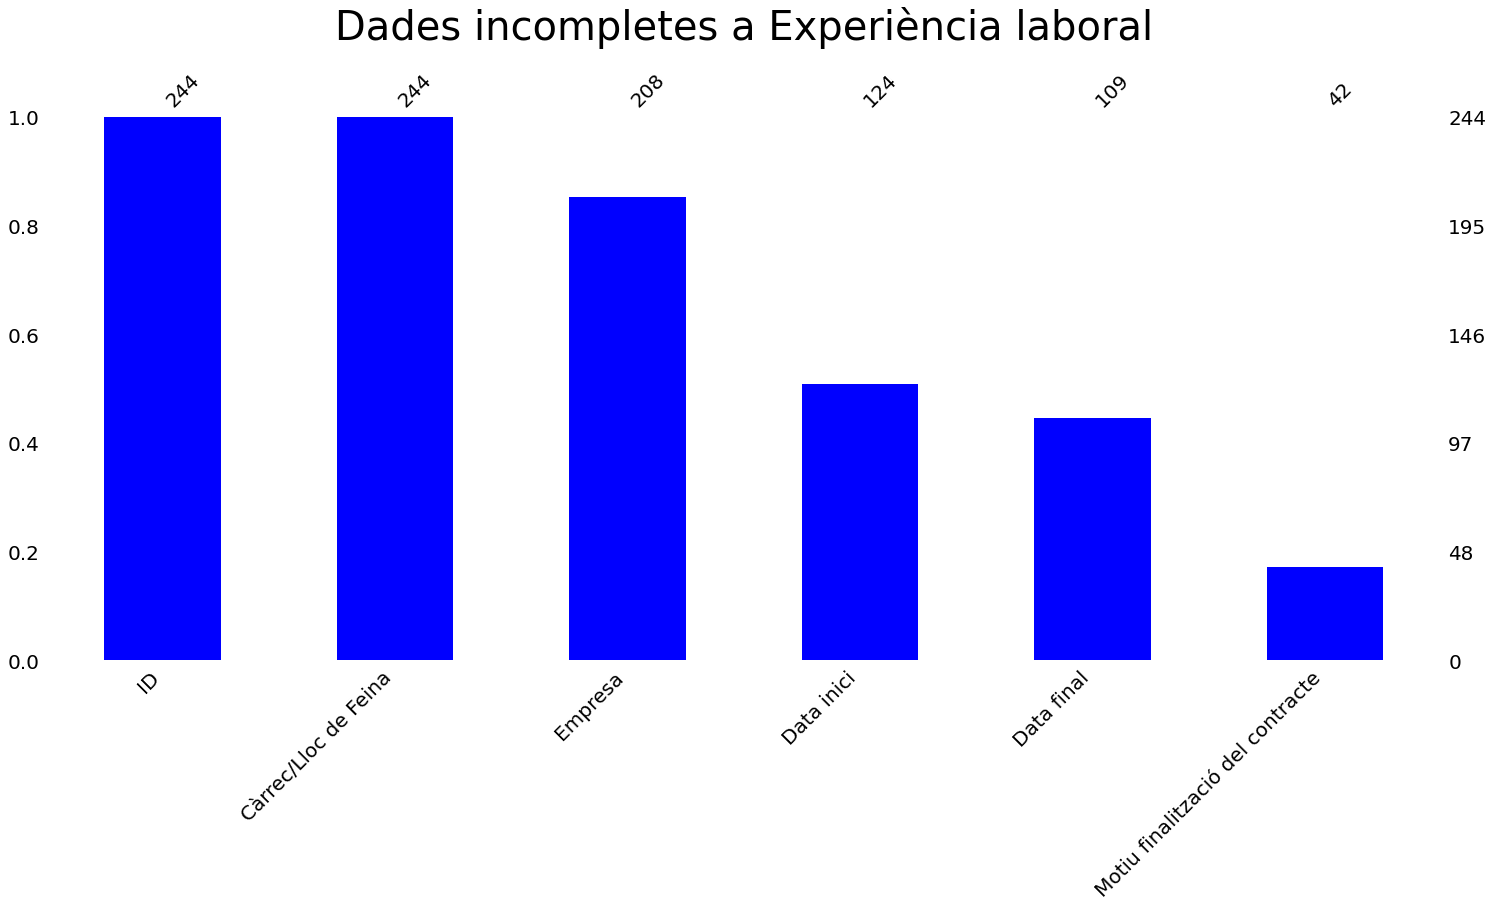

In [7]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Experiència laboral',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

Segons la la quanitat de nans i la importància de la informació seleccionem les següents variables


In [8]:
df=df[['ID','Càrrec/Lloc de Feina','Empresa','Data inici','Data final']]

In [9]:
#pasar Data inici y Data final a forma datetime
df['Data inici']=pd.to_datetime(df['Data inici'])
df['Data final']=pd.to_datetime(df['Data final'])
df.head()

/tmp/ipykernel_13500/3087676023.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data inici']=pd.to_datetime(df['Data inici'])
/tmp/ipykernel_13500/3087676023.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data final']=pd.to_datetime(df['Data final'])


,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01


A partir de les dades que tenim creiem que calcular el temps de duració del contracte ens podrà ajudar a en la predicció del temps que triga una persona a trobar feina

In [10]:
#crear columna amb nombre Temps para calcular el temps de duració del contracte
df['Temps']=df['Data final']-df['Data inici']
df['Temps']=df['Temps'].dt.days
df.head()

,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0


In [11]:
#sumem els valors de Temps per tal de calcular el temps total d'experiència de la persona
df['Temps total experiència'] = df.groupby('ID')['Temps'].transform('sum')
df.head()

,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps,Temps total experiència
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN,738.0
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN,0.0
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN,0.0
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN,1461.0
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0,7811.0


La data a la que una persona s'incorpora al mercat laboral també hem pensat que ens pot donar una informació rellevant per la qual cosa creem aquesta variable

In [12]:
#creem la coluna Data incorporació mercat laboral seleccionant el valor mínim de la data d'inici
df['Data incorporació mercat laboral'] = df.groupby('ID')['Data inici'].transform('min')
df.head()


,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps,Temps total experiència,Data incorporació mercat laboral
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN,738.0,2018-03-08
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN,0.0,NaT
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN,0.0,NaT
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN,1461.0,2001-01-01
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0,7811.0,1997-01-01


La quantitat d'experiències laborals també ens pot donar més informació i ajudar a la predicció, per la qual cosa creem dita variable

In [13]:
#crear columna amb la quantitat d'experiències laborals
counts = df['ID'].value_counts()
df["Nombre d'experiències"] = df['ID'].map(counts)
df.head()

,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps,Temps total experiència,Data incorporació mercat laboral,Nombre d'experiències
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN,738.0,2018-03-08,3
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN,0.0,NaT,4
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN,0.0,NaT,4
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN,1461.0,2001-01-01,3
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0,7811.0,1997-01-01,3


In [14]:
#seleccionem les columnes que ens serveixen per a treballar, ja que la columna Càrrec i Empresa tenen valors no classificats que no ens donen informació rellevant
df=df[['ID','Data incorporació mercat laboral','Temps total experiència',"Nombre d'experiències"]]
df.head()

,ID,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,2018-03-08,738.0,3
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,NaT,0.0,4
2,192c9601-2996-00a7-2904-5cee874ded1e,NaT,0.0,4
3,b71063b1-c757-200e-69ee-5d9c7a934efd,2001-01-01,1461.0,3
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,1997-01-01,7811.0,3


In [15]:
#pasar Data incorporació mercat laboral a datetime
df['Data incorporació mercat laboral']=pd.to_datetime(df['Data incorporació mercat laboral'])

In [16]:
#mantenim les entrades amb la data incorporació al mercat laboral més antiga
# Ordenar el DataFrame por la columna "Data incorporació mercat laboral"
df = df.sort_values('Data incorporació mercat laboral')

# Eliminar las filas duplicadas por la columna "ID" manteniendo la primera aparición de cada valor en dicha columna
df = df.drop_duplicates('ID', keep='first')


<AxesSubplot: title={'center': 'Dades incompletes a Experiència laboral'}>

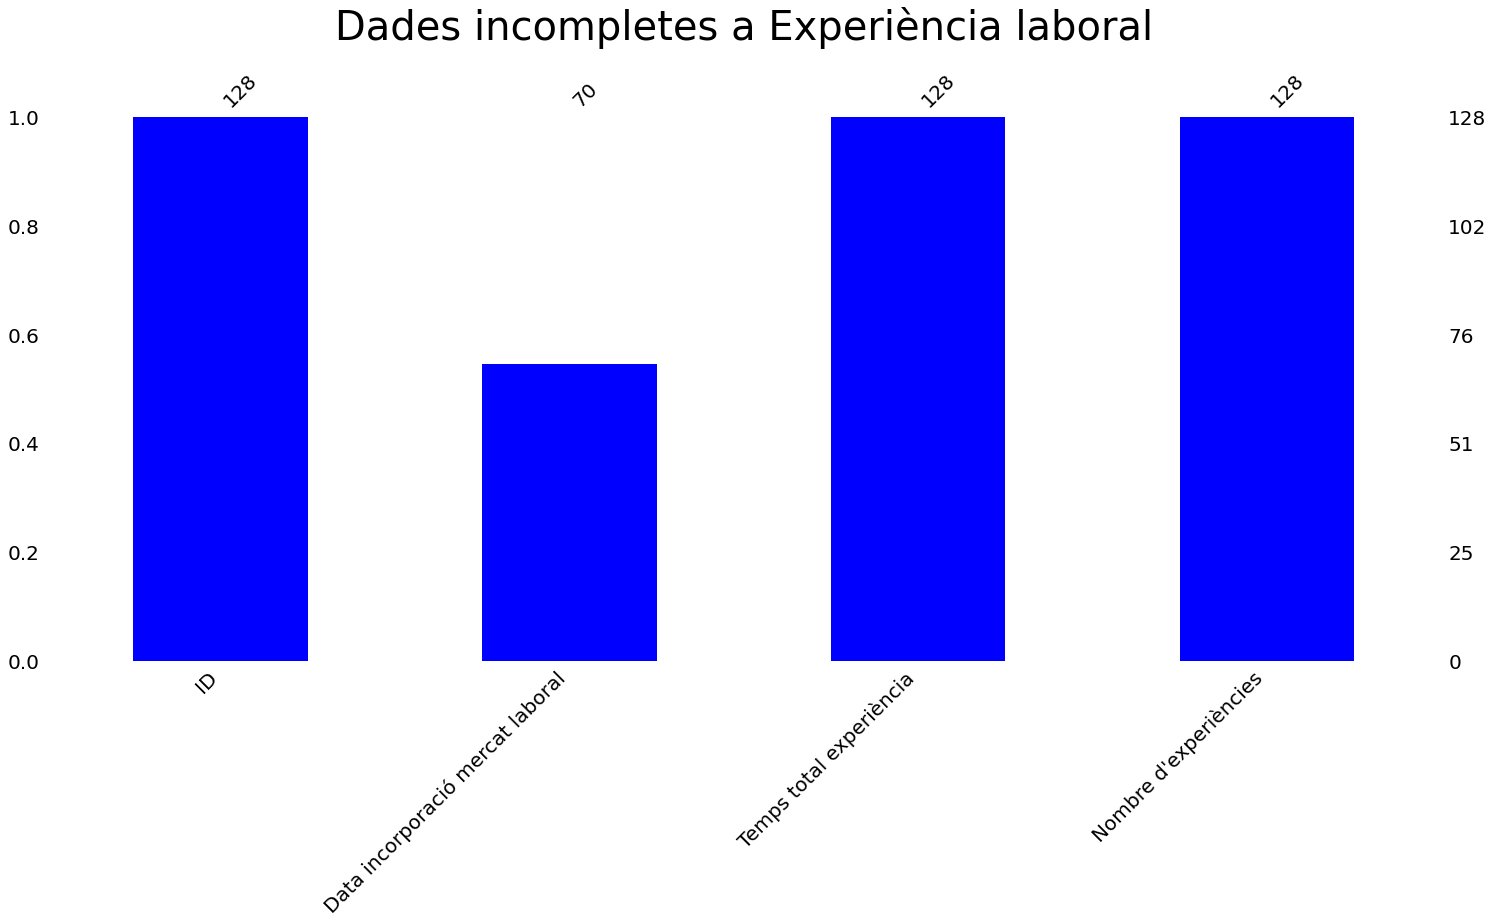

In [17]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Experiència laboral',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

Encara que no tenim dades faltants en el temps total d'experiència de la persona podem deduir que en faltar gairebé la meitat de les dade en la data d'incorporació al mercat laboral tindrem molts valors a zero en el temps total d'experiència

In [18]:
#observem el percentage de valors 0 a Temps total experiència per tal de detectar possibles valors faltants
(df['Temps total experiència'] == 0).sum()/df.shape[0]*100

53.125

Tal com havíem previst un gran nombre de les entrades (un 53%) tenen un temps total d'experiència igual a 0 la qual cosa indica que falten les dades per poder fer aquest càlcul

In [19]:
#pasar df_experiencia_laboral a csv
df.to_csv('experiencia_laboral_final.csv', index=False, encoding='utf-8')